In [18]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


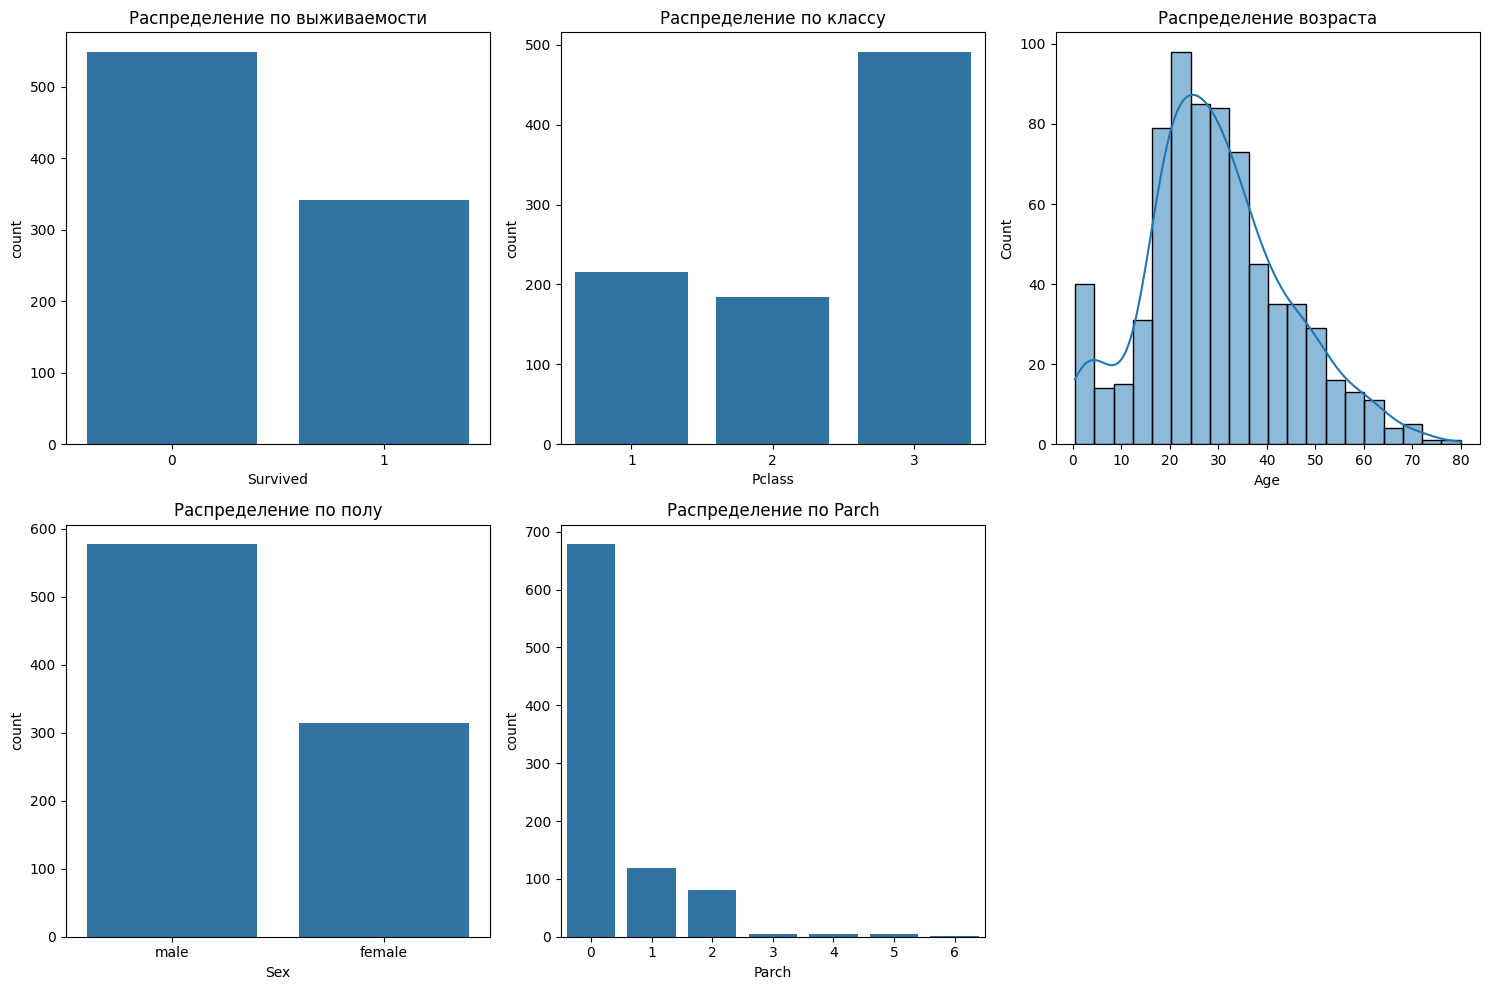

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(data=df, x='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Распределение по выживаемости')

sns.countplot(data=df, x='Pclass', ax=axes[0, 1])
axes[0, 1].set_title('Распределение по классу')

sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Распределение возраста')

sns.countplot(data=df, x='Sex', ax=axes[1, 0])
axes[1, 0].set_title('Распределение по полу')

sns.countplot(data=df, x='Parch', ax=axes[1, 1])
axes[1, 1].set_title('Распределение по Parch')

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

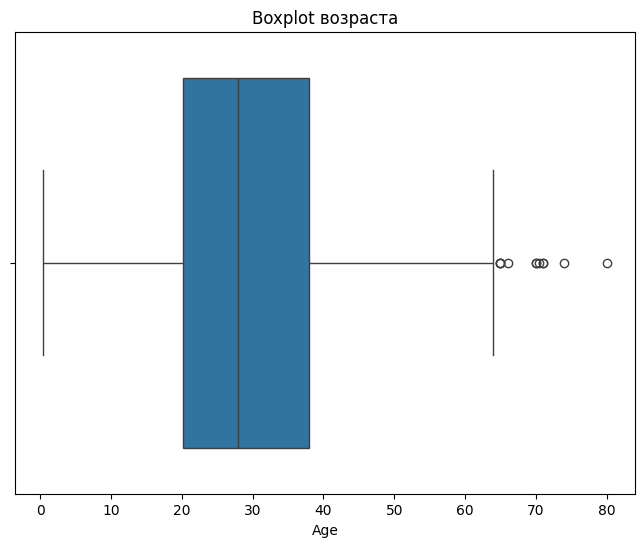

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age')
plt.title('Boxplot возраста')
plt.xlabel('Age')
plt.show()

График показывает распределение возрастов пассажиров.

Центральная линия в ящике (медиана) указывает на средний возраст.

Верхний и нижний концы ящика (квартиль 1 и 3) показывают диапазон возрастов.

"Усы" показывают, до какого значения в пределах данных находятся максимальные и минимальные значения.

Точки за пределами усов — это выбросы (экстремальные значения).

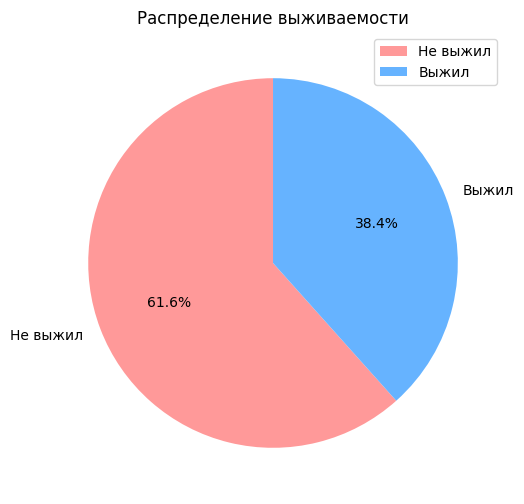

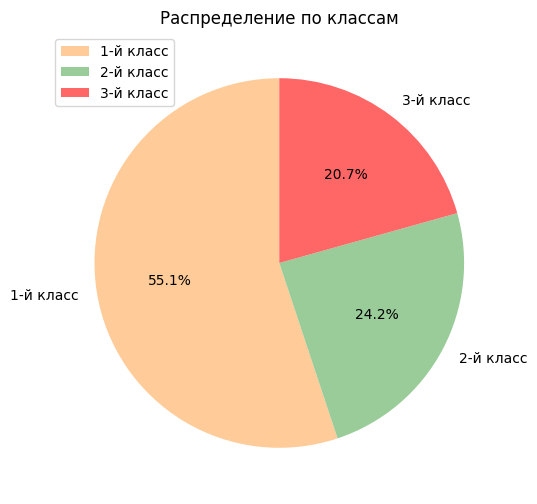

In [26]:
plt.figure(figsize=(8, 6))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], labels=['Не выжил', 'Выжил'], startangle=90, legend=True)
plt.title('Распределение выживаемости')
plt.ylabel('')
plt.show()

# Pie chart для Pclass
plt.figure(figsize=(8, 6))
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ffcc99','#99cc99','#ff6666'], labels=['1-й класс', '2-й класс', '3-й класс'], startangle=90, legend=True)
plt.title('Распределение по классам')
plt.ylabel('')
plt.show()

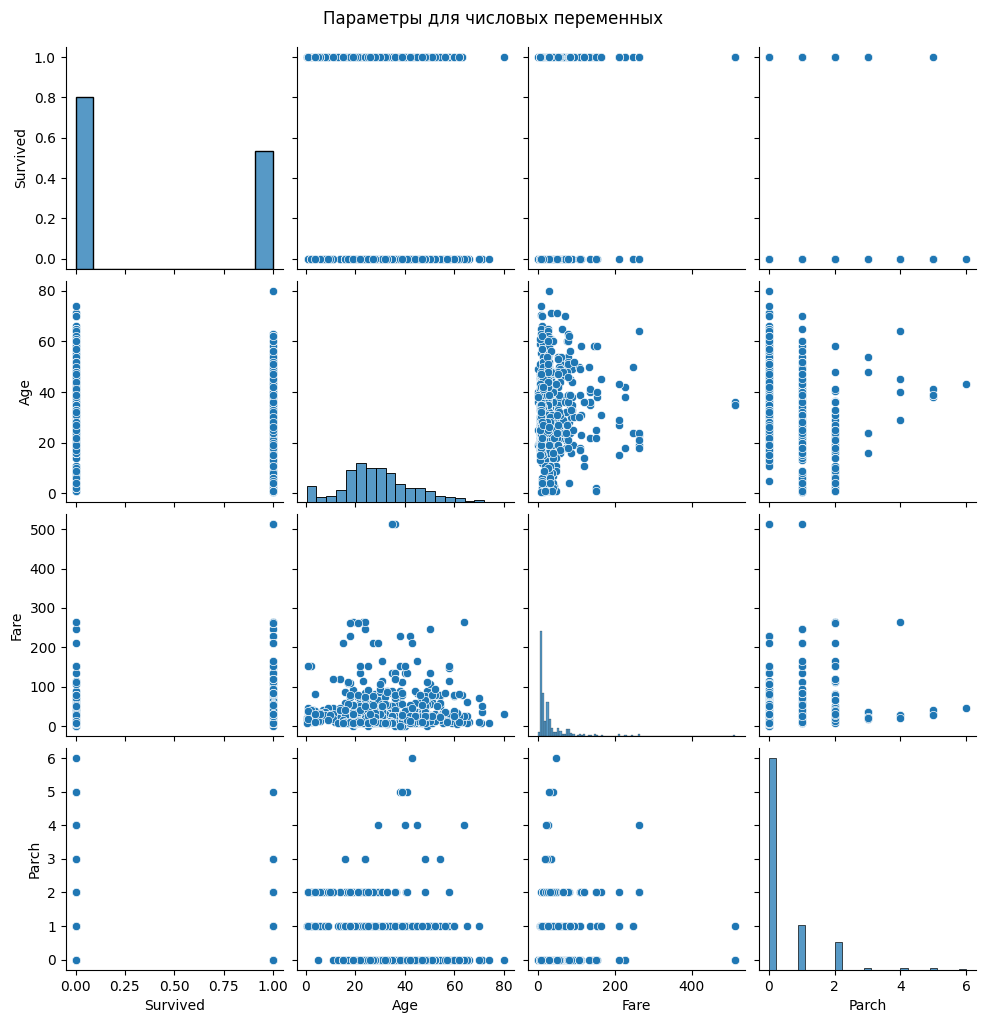

In [27]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Parch']].dropna())
plt.suptitle('Параметры для числовых переменных', y=1.02)
plt.show()

In [29]:
import plotly.express as px

# Группируем данные по классу и полу
sunburst_data = df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

# Строим sunburst plot
fig = px.sunburst(sunburst_data, path=['Pclass', 'Sex'], values='Count',
                  title="Распределение пассажиров по классу и полу")
fig.show()
